# Predicting the top 10 FIfa23 Players


**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler,MinMaxScaler
import plotly.express as px

**Importing Dataset**

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/FIFA23_official_data.csv")

data
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')

**Data Preprocessing**

In [ ]:
#Converting Wage,Value,PlayerValue,ReleaseValue from string to numeric
data["Wage"]=data["Wage"].str.replace('€', '')
data["Wage"]=data["Wage"].str.replace('K', '000')

def convert_currency(value):
    floatvalue = 0.0
    strvalue=""
    if "M" in value:
        strvalue=value.replace("M","").replace("€","")
        floatvalue=float(float(strvalue)*1000000)
    elif "K" in value:
        strvalue=value.replace("K","").replace("€","")
        floatvalue=float(float(strvalue)*1000)
    else:
        floatvalue=value.replace("€","")
    return floatvalue
data.dropna(subset=["Value"], how='all', inplace=True)
data["PlayerValue"] = data["Value"].apply(convert_currency).astype(float)
data.dropna(subset=["Release Clause"], how='all', inplace=True)
data["ReleaseValue"] = data["Release Clause"].apply(convert_currency).astype(float)


**Data Visualization**

In [ ]:
# Number of Players by Nationality
fig = px.histogram(df, x="Nationality", nbins=10)
fig.update_layout(title='Distribution of Nationalitys of Football Teams', xaxis=dict(tickangle=45))
fig.show()

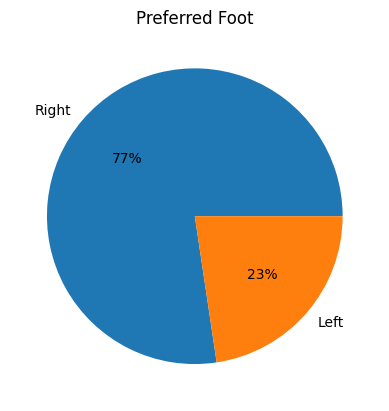

In [ ]:
# Number of Players By Peferred Foot
preferred_foot=data["Preferred Foot"].value_counts()
plt.pie(preferred_foot.values,labels=preferred_foot.index,autopct='%.0f%%')
plt.title("Preferred Foot")
plt.show()


In [ ]:
#Removing Columns
df=data
col=['ID','Name','Age','Value','Release Clause','Photo', 'Nationality', 'Flag','Club',
     'Potential', 'Club Logo','Preferred Foot', 'Weak Foot', 'Work Rate', 'Body Type',
       'Real Face', 'Height', 'Weight',
     'Skill Moves','Position','Joined', 'Loaned From',
     'Contract Valid Until','Kit Number', 'Best Overall Rating']
data=data.drop(columns=col,axis=1)
print(data.columns)

Index(['Overall', 'Wage', 'Special', 'International Reputation', 'PlayerValue',
       'ReleaseValue'],
      dtype='object')


**Feature Scaling**

In [ ]:
scaler=RobustScaler()
for i in data.columns:
    data[i]=scaler.fit_transform(data[[i]])

data["Complete Stats"]=data["Overall"]+data["Wage"]+data["Special"]+data["International Reputation"]+data["PlayerValue"]+data["ReleaseValue"]

sc=MinMaxScaler()
data["Complete Stats"]=sc.fit_transform(data[["Complete Stats"]])



**Top 10 Players by the datas of their overall,wage,special,international reputation,PlayerValue,ReleaseValue**

In [ ]:
df["Stats"]=data["Complete Stats"]

df=df.sort_values(by=["Stats"],ascending=False)
df["rank"]=range(1,16510)
print(df.head(10)["Name"])

75           K. Mbappé
180         E. Haaland
3         K. De Bruyne
17          F. de Jong
25            M. Salah
41      R. Lewandowski
849       Vinícius Jr.
52             H. Kane
1767        Rúben Dias
214              Pedri
Name: Name, dtype: object


**Top Player Analysis**

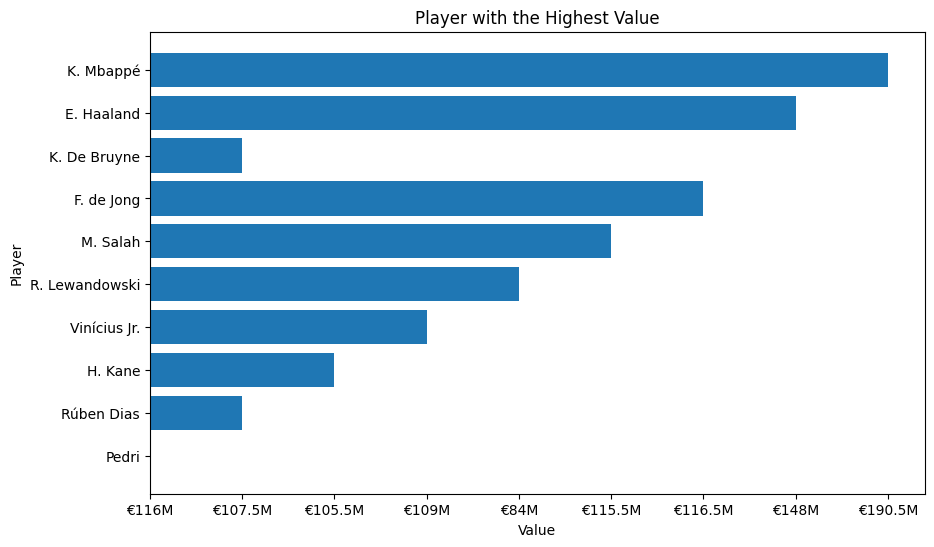

In [ ]:
# Top Players and their Value
player_name = df.iloc[:10]['Name']
player_name=player_name.iloc[::-1]
player_value = df.iloc[:10]['Value']
player_value=player_value.iloc[::-1]
plt.figure(figsize=(10, 6))
plt.barh(player_name, player_value)
plt.xlabel('Value')
plt.ylabel('Player')
plt.title('Player with the Highest Value')
plt.show()


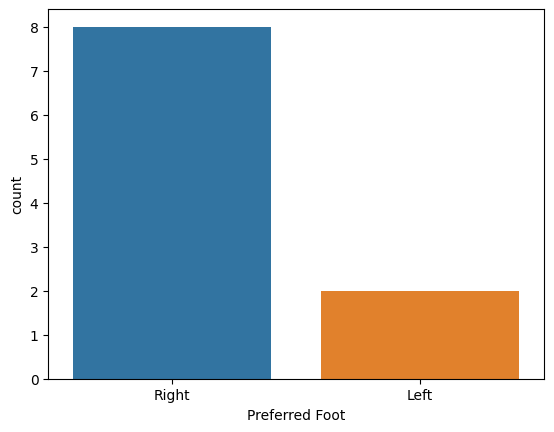

In [ ]:
# Top Player Analysis by thier Preferred Foot
Preferred_foot=df.iloc[:1]
Preferred_foot=df.iloc[:10]["Preferred Foot"]
sns.countplot(x=Preferred_foot)
plt.show()

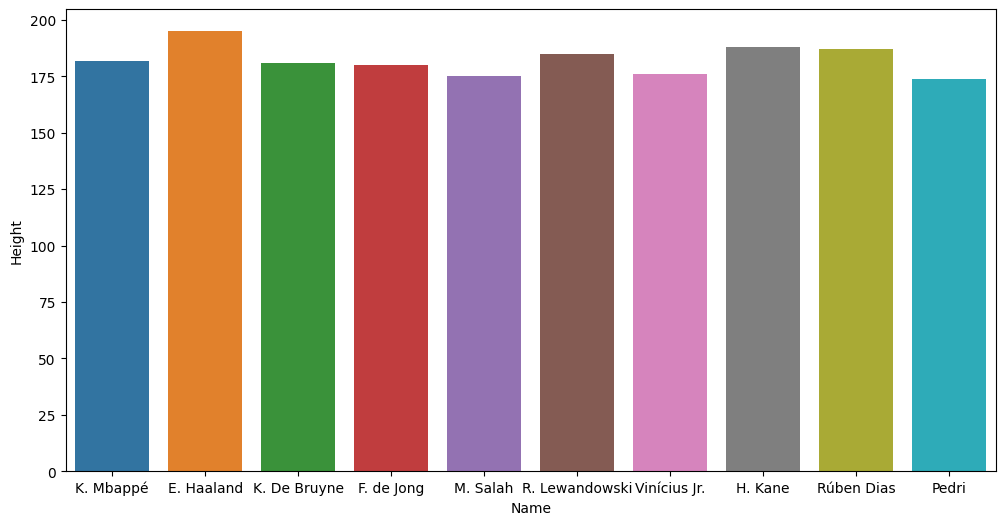

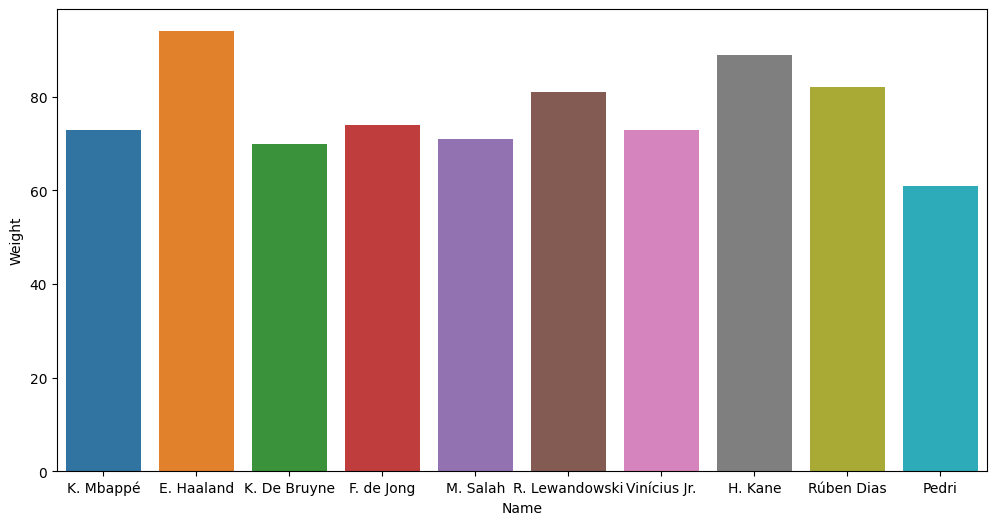

In [ ]:
# Top Player Analysis by their Height
df["Height"]=df["Height"].str.replace('cm', '')
height=df.iloc[:10]["Height"]
plt.figure(figsize=(12,6))
sns.barplot(x=df.iloc[:10]["Name"],y=height.astype(int))
plt.show()
# Top Player Analysis by their Weight
df["Weight"]=df["Weight"].str.replace('kg', '')
Weight=df.iloc[:10]["Weight"]
plt.figure(figsize=(12,6))
sns.barplot(x=df.iloc[:10]["Name"],y=Weight.astype(int))
plt.show()

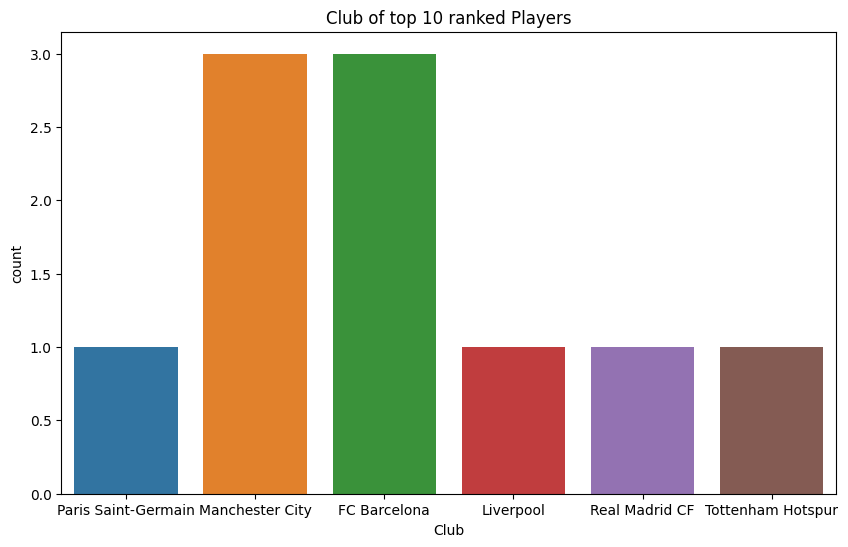

In [ ]:
# Top Player Analysis by thier Club
plt.figure(figsize=(10,6))
Club=df.iloc[:10]["Club"]
sns.countplot(x=Club)
plt.title("Club of top 10 ranked Players")
plt.show()
